# Traffic Accidents in Denver - Incident Analysis & Report

- Katie Chen
- Zachary Francis

## Part I. Problem Statement - Dataset & Motivation
Denver's Open Data Catalogue keeps an open record of traffic accidents from the past few years in their [Open Data Catalogue](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents).  This data set can be used to possibly answer several inquiries:
- Are traffic accidents in Denver on an upward or downward trend?
- Are serious injuries or fatalites changing in any significant way?
- Are fatalaties or injuries more likely when a certain type of vehicle is at fault? Is the struck vehicle?

Other questions may arrise in exploratory data analysis.  This data set is only for traffic accidents in Denver.  It may be combined or compared against similar data sets for other major cities to characterize vehicle safetly in Denver against similar metropolitan areas. 

The data set can be accessed by downloading a CSV or calling against the REST API.  Ultimately it is a large file of comma separated values, with 48 columnns.  Not all the columns will be of use - there is especially a lot of location/spatial data that will probably not be prudent to the goals of this data analysis.  The CSV file has been downloaded and is included in the git repository of this notebook.  To make comparisons with traffic data from other cities, similar data sets will need to downloaded (or to save on reposity space - access through a web api via a `curl` call).  Comparing this data set against [Denver Traffic Counts](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-counts) might also be useful to normalize the data against traffic density.  

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Takes 2+ minutes to download when the curl is executed
!curl -o traffic_accidents.csv https://www.denvergov.org/media/gis/DataCatalog/traffic_accidents/csv/traffic_accidents.csv
!head -n1 traffic_accidents.csv | tr ',' '\n' | nl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) schannel: next InitializeSecurityContext failed: Unknown error (0x80092012) - The revocation function was unable to check revocation for the certificate.
'head' is not recognized as an internal or external command,
operable program or batch file.


Some columns of interest will be the date, geospatial data if a an assessment is to be made on what driving locations or the most dangerous in Denver, the road description, the vehicle types, fatalities, and injuries.  Many of the records show signs of being hand entered, and there are cases of missing data.

In [173]:
traffic_data = pd.read_csv('traffic_accidents.csv')
traffic_data.head()

C:\Users\katie\AppData\Local\Temp\ipykernel_13172\772556337.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv('traffic_accidents.csv')


,shape,object_id,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y
0,<geoprocessing describe geometry object object...,74526,2018389981,201838998154200,5420,0,TRAF - ACCIDENT - DUI/DUID,2018-06-10 17:50:00,2018-06-10 17:50:00,2018-06-10 19:27:00,...,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
1,<geoprocessing describe geometry object object...,74527,2018335917,201833591754200,5420,0,TRAF - ACCIDENT - DUI/DUID,2018-05-19 02:15:00,2018-05-19 02:15:00,2018-05-19 02:15:00,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
2,<geoprocessing describe geometry object object...,74528,201812318,20181231854010,5401,0,TRAF - ACCIDENT - HIT & RUN,2018-01-05 23:00:00,2018-01-05 23:00:00,2018-01-06 09:45:00,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
3,<geoprocessing describe geometry object object...,74529,2018516166,201851616654410,5441,0,TRAF - ACCIDENT,2018-07-30 13:40:00,2018-07-30 13:40:00,2018-07-30 14:30:00,...,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
4,<geoprocessing describe geometry object object...,74530,2018558542,201855854254410,5441,0,TRAF - ACCIDENT,2018-08-16 13:14:00,2018-08-16 13:14:00,2018-08-16 14:10:00.000001,...,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN


There are 48 columns:
1. __SHAPE:__ Not described in the metadata
1. __OBJECTID_1:__ Record identification number used in this dataset
1. __INCIDENT_ID:__ Official record identification number assigned by the Denver Police Department
1. __OFFENSE_ID:__ Concatenation of INCIDENT_ID, OFFENSE_CODE, and OFFENSE_CODE_EXTENSION
1. __OFFENSE_CODE:__ Code indicating the type of offense
1. __OFFENSE_CODE_EXTENSION:__ Code indicating the offense subtype, if applicable
1. __TOP_TRAFFIC_ACCIDENT_OFFENSE:__ The most significant motor vehicle accident offense associated with the crash (in order, most to least): FATAL, SBI, HIT & RUN, DUI, POLICE, ACCIDENT
1. __FIRST_OCCURRENCE_DATE:__ Earliest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __LAST_OCCURRENCE_DATE:__ Latest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __REPORTED_DATE:__ Date and time the crash was reported to DPD
1. __INCIDENT_ADDRESS:__ Approximate location of the incident
1. __GEO_X:__ Approximate horizontal location (east-west) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_Y:__ Approximate vertical location (north-south) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_LON:__ Approximate horizontal location (east-west) of crash defined in WGS 1984 geographic coordinate system
1. __GEO_LAT:__ Approximate vertical location (north-south) of crash defined in WGS 1984 geographic coordinate system
1. __DISTRICT_ID:__ Denver Police District where the crash occurred
1. __PRECINCT_ID:__	Denver Police Precinct where the crash occurred
1. __NEIGHBORHOOD_ID:__	Neighborhood where the crash occurred
1. __BICYCLE_IND:__ Indicates how many people riding bicycles were involved with the crash
1. __PEDESTRIAN_IND:__ Indicates how many pedestrians were involved with the crash
1. __HARMFUL_EVENT_SEQ_1:__ Indicates the first occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_2:__ Indicates the second occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_3:__ Indicates the most harmful event in the crash
1. __ROAD_LOCATION:__ Describes the specific location of the crash in relation to the roadway or if on private property
1. __ROAD_DESCRIPTION:__ Describes the specific location of the crash in relation to intersections, alleys, driveways, highway interchanges, and parking lots
1. __ROAD_CONTOUR:__ Describes the specific location of the crash relating to horizonal and vertical curves at the location of the first harmful event
1. __ROAD_CONDITION:__ Describes the roadway conditions at the time and location of the crash
1. __LIGHT_CONDITION:__ Describes the roadway lighting conditions at the time and location of the crash
1. __TU1_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 1
1. __TU1_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 1
1. __TU1_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 1
1. __TU1_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 1, when applicable
1. __TU1_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 1, when applicable
1. __TU1_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 1, when applicable
1. __TU2_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 2
1. __TU2_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 2
1. __TU2_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 2
1. __TU2_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 2, when applicable
1. __TU2_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 2, when applicable
1. __TU2_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 2, when applicable
1. __SERIOUSLY_INJURED:__ Indicates the number of people who were seriously injured as a result of the crash
1. __FATALITIES:__ Indicates the number of people who were fatally injured as a result of the crash
1. __FATALITY_MODE_1:__ Indicates the mode (means of travel) of a person fatally injured as a result of the crash, not related to traffic unit number
1. __FATALITY_MODE_2:__ Indicates the mode (means of travel) of a second person fatally injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_1:__ Indicates the mode (means of travel) of a person seriously injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_2:__ Indicates the mode (means of travel) of a second person seriously injured as a result of the crash, not related to traffic unit number
1. __POINT_X:__ Not described in the metadata
1. __POINT_Y:__ Not described in the metadata

### Part II. Literary Analysis

Previous works primarily focus on road conditions, time of day, location, and various human factors that contribute to traffic accidents, e.g. dry/icy roads, intersection vs. non intersection, driver action, etc. We know from these studies that the human factor causing the overwhelming majority of traffic accidents include aggressive/reckless driving, distracted driving, and inexperience. Injuries and fatalities from traffic accidents are least common on weekdays between midnight-5am, but spike on weekends including Fridays at around 2:30am. We also know that fatalities and injuries tend to occur around street non-intersections and intersections, with I-70 and Peoria Street being the most dangerous locations to date.

Our work differs from these analyses by focusing primarily on the vehicle types and details of mode of transport of the recorded incident. What types of vehicles cause the most injuries/fatalities? Are injuries and fatalities more likely when a certain type of vehicle is at fault? Our analysis digs deeper into the relationships between the different types of vehicles and modes of transport between a driver being hit and the driver at fault.

** See other works here:
- https://medium.com/denvertraffic/traffic-accident-analysis-and-predictive-indicators-in-denver-colorado-cbf3fd1bad00
- https://github.com/johnherr/Traffic-Accidents-in-Denver

### Part III. Data Cleaning & Type Conversion

To answer the research question, we first drop several columns from the data set that will not be relevant in the context of this problem:

1. __SHAPE__
1. __OBJECT_ID__
1. __INCIDENT_ID__
1. __OFFENSE_ID__
1. __POINT_X__
1. __POINT_Y__
1. __FIRST_OCCURRENCE_DATE__
1. __LAST_OCCURRENCE_DATE__


In [174]:
# Dropping columns that won't be of obvious use
to_drop = ["shape","object_id","incident_id", "offense_id", "POINT_X", "POINT_Y",
           "first_occurrence_date", "last_occurrence_date"]
traffic_data = traffic_data.drop(to_drop, axis=1)

Showing the datatypes of the modified dataframe:

In [175]:
traffic_data.dtypes

offense_code                       int64
offense_code_extension             int64
top_traffic_accident_offense      object
reported_date                     object
incident_address                  object
geo_x                            float64
geo_y                            float64
geo_lon                          float64
geo_lat                          float64
district_id                       object
precinct_id                      float64
neighborhood_id                   object
bicycle_ind                      float64
pedestrian_ind                   float64
HARMFUL_EVENT_SEQ_1               object
HARMFUL_EVENT_SEQ_2               object
HARMFUL_EVENT_SEQ_MOST            object
road_location                     object
ROAD_DESCRIPTION                  object
ROAD_CONTOUR                      object
ROAD_CONDITION                    object
LIGHT_CONDITION                   object
TU1_VEHICLE_TYPE                  object
TU1_TRAVEL_DIRECTION              object
TU1_VEHICLE_MOVE

Checking for null values, we have:

In [176]:
traffic_data.isnull().sum()

offense_code                         0
offense_code_extension               0
top_traffic_accident_offense         0
reported_date                        0
incident_address                     0
geo_x                             8836
geo_y                             8836
geo_lon                           8836
geo_lat                           8836
district_id                       2791
precinct_id                       8897
neighborhood_id                  11062
bicycle_ind                       5023
pedestrian_ind                    5023
HARMFUL_EVENT_SEQ_1                251
HARMFUL_EVENT_SEQ_2              20851
HARMFUL_EVENT_SEQ_MOST            1276
road_location                     1163
ROAD_DESCRIPTION                   160
ROAD_CONTOUR                      1032
ROAD_CONDITION                     213
LIGHT_CONDITION                    194
TU1_VEHICLE_TYPE                  2199
TU1_TRAVEL_DIRECTION              2975
TU1_VEHICLE_MOVEMENT              3076
TU1_DRIVER_ACTION        

Because our dataset is large, we can drop all rows with missing values with minimal loss of information. Below we can see the percentage of missing values for each column given the dataset:

In [177]:
percent_missing = traffic_data.isnull().sum() * 100 / len(traffic_data)
print(percent_missing)

offense_code                      0.000000
offense_code_extension            0.000000
top_traffic_accident_offense      0.000000
reported_date                     0.000000
incident_address                  0.000000
geo_x                             3.870261
geo_y                             3.870261
geo_lon                           3.870261
geo_lat                           3.870261
district_id                       1.222487
precinct_id                       3.896980
neighborhood_id                   4.845273
bicycle_ind                       2.200127
pedestrian_ind                    2.200127
HARMFUL_EVENT_SEQ_1               0.109941
HARMFUL_EVENT_SEQ_2               9.132958
HARMFUL_EVENT_SEQ_MOST            0.558901
road_location                     0.509406
ROAD_DESCRIPTION                  0.070082
ROAD_CONTOUR                      0.452027
ROAD_CONDITION                    0.093296
LIGHT_CONDITION                   0.084974
TU1_VEHICLE_TYPE                  0.963185
TU1_TRAVEL_

Dropping rows with missing values, we have:

In [178]:
traffic_data = traffic_data.dropna()
traffic_data

,offense_code,offense_code_extension,top_traffic_accident_offense,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
0,5420,0,TRAF - ACCIDENT - DUI/DUID,2018-06-10 19:27:00,1100 BLOCK E COLFAX AVE,3148028.0,1694838.0,-104.973623,39.739957,6,...,PARKED,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
1,5420,0,TRAF - ACCIDENT - DUI/DUID,2018-05-19 02:15:00,I25 HWYSB / W ALAMEDA AVE,3140912.0,1684324.0,-104.999133,39.711205,3,...,GOING STRAIGHT,CARELESS DRIVING,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
2,5401,0,TRAF - ACCIDENT - HIT & RUN,2018-01-06 09:45:00,819 N COLORADO BLVD,3157235.0,1691097.0,-104.940967,39.729536,2,...,PARKED,OTHER,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
3,5441,0,TRAF - ACCIDENT,2018-07-30 14:30:00,I25 HWYNB / W 8TH AVE,3136459.0,1690899.0,-105.014836,39.729321,1,...,CHANGING LANES,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
4,5441,0,TRAF - ACCIDENT,2018-08-16 14:10:00.000001,W ILIFF AVE / S FEDERAL BLVD,3133684.0,1671145.0,-105.025069,39.675132,4,...,STOPPED IN TRAFFIC,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228300,5441,0,TRAF - ACCIDENT,2018-04-28 15:40:00.000001,I25 HWYNB / S FRANKLIN ST,3149516.0,1675803.0,-104.968728,39.687678,3,...,STOPPED IN TRAFFIC,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
228301,5401,0,TRAF - ACCIDENT - HIT & RUN,2018-11-28 19:12:00.000001,I70 HWYEB / N NORTHFIELD QUEBEC ST,3167637.0,1708927.0,-104.903568,39.778301,5,...,STOPPED IN TRAFFIC,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
228302,5441,0,TRAF - ACCIDENT,2018-12-06 18:14:00,N LINCOLN ST / E 14TH AVE,3144516.0,1694266.0,-104.986123,39.738442,6,...,STOPPED IN TRAFFIC,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER
228303,5441,0,TRAF - ACCIDENT,2018-02-07 18:34:00,E HAMPDEN AVE / S YOSEMITE ST,3173225.0,1663345.0,-104.884786,39.653068,3,...,SLOWING,No Action,NO APPARENT,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER


The columns __FATALITY_MODE_1__, __FATALITIY_MODE_2__, __SERIOUSLY_INJURED_MODE_1__, and __SERIOUSLY_INJURED_MODE_2__ have row values of empty string ' '. For these categories, we replaced ' ' with the label 'NOT APPLICABLE', indicating those incidents as those which cannot be categorized with the current labels. 

In [179]:
print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['OTHER' 'PASSENGER CAR/VAN' 'BICYCLE' 'PEDESTRIAN' 'MOTORCYCLE'
 'VEHICLE OVER 10000 LBS' 'SUV' '  ' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PICKUP TRUCK/UTILITY VAN'
 'FARM EQUIPMENT' 'SCHOOL BUS']

 Fatality Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' '  ' 'MOTORCYCLE' 'PICKUP TRUCK/UTILITY VAN']

 Seriously Injured Mode 1:  ['OTHER' 'MOTORCYCLE' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV'
 'BICYCLE' 'PEDESTRIAN' 'VEHICLE OVER 10000 LBS'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'MOTORIZED BICYCLE' '  ' 'SUV WITH TRAILER' 'NON-SCHOOL BUS'
 'TRANSIT BUS' 'LIGHT RAIL' 'HIT AND RUN UNKNOWN' 'SCHOOL BUS']

 Seriously Injured Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV' 'PEDESTRIAN'
 '  ' 'VEHICLE OVER 10000 LBS' 'MOTORCYCLE' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'TRANSIT BUS' 'MOTORIZED BICYCLE' 'SCHOOL BUS' 'NON-SCHOOL BUS'
 'SUV WITH T

In [180]:
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('  ', 'N/A')
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('  ', 'N/A')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('  ', 'N/A')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('  ', 'N/A')

#Now we have N/A labels instead of whitespaces

print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['OTHER' 'PASSENGER CAR/VAN' 'BICYCLE' 'PEDESTRIAN' 'MOTORCYCLE'
 'VEHICLE OVER 10000 LBS' 'SUV' 'N/A' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PICKUP TRUCK/UTILITY VAN'
 'FARM EQUIPMENT' 'SCHOOL BUS']

 Fatality Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' 'N/A' 'MOTORCYCLE' 'PICKUP TRUCK/UTILITY VAN']

 Seriously Injured Mode 1:  ['OTHER' 'MOTORCYCLE' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV'
 'BICYCLE' 'PEDESTRIAN' 'VEHICLE OVER 10000 LBS'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'MOTORIZED BICYCLE' 'N/A' 'SUV WITH TRAILER' 'NON-SCHOOL BUS'
 'TRANSIT BUS' 'LIGHT RAIL' 'HIT AND RUN UNKNOWN' 'SCHOOL BUS']

 Seriously Injured Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV' 'PEDESTRIAN'
 'N/A' 'VEHICLE OVER 10000 LBS' 'MOTORCYCLE' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'TRANSIT BUS' 'MOTORIZED BICYCLE' 'SCHOOL BUS' 'NON-SCHOOL BUS'
 'SUV WI

For these 4 columns, we also have some duplicate labels that are likely a result of changes over time in labeling rules, typos, or changing naming conventions. For these values, we simply replace them with a single label, e.g. 'Passenger Car/Passenger Van' = 'PASSENGER CAR/VAN'.

In [181]:
# Manual Re-labeling

# Fatality Mode 1
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['FATALITY_MODE_1'] = traffic_data['FATALITY_MODE_1'].replace('Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000', 'VEHICLE OVER 10000 LBS')

# Fatality Mode 2
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['FATALITY_MODE_2'] = traffic_data['FATALITY_MODE_2'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')

# Seriously Injured Mode 1
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('NON-SCHOOL BUS', 'TRANSIT BUS')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Other Vehicle Type (Describe in Narative)', 'OTHER')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000', 'VEHICLE OVER 10000 LBS')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Unknown (Hit and Run Only)', 'HIT AND RUN UNKNOWN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('PEDESTERIAN', 'PEDESTRIAN')
traffic_data['SERIOUSLY_INJURED_MODE_1'] = traffic_data['SERIOUSLY_INJURED_MODE_1'].replace('Transit Bus', 'TRANSIT BUS')


# Seriously Injured Mode 2
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Pickup Truck/Utility Van', 'PICKUP TRUCK/UTILITY VAN')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('Motorcycle', 'MOTORCYCLE')
traffic_data['SERIOUSLY_INJURED_MODE_2'] = traffic_data['SERIOUSLY_INJURED_MODE_2'].replace('NON-SCHOOL BUS', 'TRANSIT BUS')


print("Fatality Mode 1: ",traffic_data['FATALITY_MODE_1'].unique())
print("\n", "Fatality Mode 2: ",traffic_data['FATALITY_MODE_2'].unique())
print("\n", "Seriously Injured Mode 1: ", traffic_data['SERIOUSLY_INJURED_MODE_1'].unique())
print("\n", "Seriously Injured Mode 2: ",traffic_data['SERIOUSLY_INJURED_MODE_2'].unique())

Fatality Mode 1:  ['OTHER' 'PASSENGER CAR/VAN' 'BICYCLE' 'PEDESTRIAN' 'MOTORCYCLE'
 'VEHICLE OVER 10000 LBS' 'SUV' 'N/A' 'MOTORIZED BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PICKUP TRUCK/UTILITY VAN'
 'FARM EQUIPMENT' 'SCHOOL BUS']

 Fatality Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' 'N/A' 'MOTORCYCLE' 'PICKUP TRUCK/UTILITY VAN']

 Seriously Injured Mode 1:  ['OTHER' 'MOTORCYCLE' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV'
 'BICYCLE' 'PEDESTRIAN' 'VEHICLE OVER 10000 LBS'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'MOTORIZED BICYCLE' 'N/A' 'SUV WITH TRAILER' 'TRANSIT BUS' 'LIGHT RAIL'
 'HIT AND RUN UNKNOWN' 'SCHOOL BUS']

 Seriously Injured Mode 2:  ['OTHER' 'PASSENGER CAR/VAN' 'PICKUP TRUCK/UTILITY VAN' 'SUV' 'PEDESTRIAN'
 'N/A' 'VEHICLE OVER 10000 LBS' 'MOTORCYCLE' 'BICYCLE'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'PASSENGER CAR/VAN WITH TRAILER'
 'TRANSIT BUS' 'MOTORIZED BICYCLE' 'SCHOOL BUS' 'SUV WITH TRAILER']


Duplicate values due to the above errors are also common in the column of interest __TU1_VEHICLE_TYPE__. To solve this, we repeat the above steps:

In [183]:
traffic_data['TU1_VEHICLE_TYPE'].unique()

traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('Passenger Car/Passenger Van', 'PASSENGER CAR/VAN')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('  ', 'N/A')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('NON-SCHOOL BUS', 'TRANSIT BUS')
traffic_data['TU1_VEHICLE_TYPE'] = traffic_data['TU1_VEHICLE_TYPE'].replace('0', 'UNK')

traffic_data['TU1_VEHICLE_TYPE'].unique()


array(['PASSENGER CAR/VAN', 'SUV', 'VEHICLE OVER 10000 LBS',
       'PICKUP TRUCK/UTILITY VAN WITH TRAILIER',
       'PICKUP TRUCK/UTILITY VAN', 'HIT AND RUN UNKNOWN', 'TRANSIT BUS',
       'OTHER', 'PASSENGER CAR/VAN WITH TRAILER', 'BICYCLE', 'MOTORCYCLE',
       'SUV WITH TRAILER', 'LIGHT RAIL', 'MOTOR HOME', 'SCHOOL BUS',
       'MOTORIZED BICYCLE', 'FARM EQUIPMENT', 'N/A', 'UNK'], dtype=object)

To view the changes over time in fatal incidents, the column __REPORTED_DATE__ will first need to be converted to a pandas Datetime object. To convert the current object into pandas Datetime format, we run:

In [184]:
traffic_data['reported_date'] = pd.to_datetime(traffic_data.reported_date, format='%Y-%m-%d %H:%M:%S')
traffic_data['Datetime'] = pd.to_datetime(traffic_data.reported_date, format='ISO8601')
traffic_data['Date'] = traffic_data.Datetime.dt.date
traffic_data['Time'] = traffic_data.Datetime.dt.time
traffic_data[['reported_date','Datetime','Date','Time']]

,reported_date,Datetime,Date,Time
0,2018-06-10 19:27:00.000000,2018-06-10 19:27:00.000000,2018-06-10,19:27:00
1,2018-05-19 02:15:00.000000,2018-05-19 02:15:00.000000,2018-05-19,02:15:00
2,2018-01-06 09:45:00.000000,2018-01-06 09:45:00.000000,2018-01-06,09:45:00
3,2018-07-30 14:30:00.000000,2018-07-30 14:30:00.000000,2018-07-30,14:30:00
4,2018-08-16 14:10:00.000001,2018-08-16 14:10:00.000001,2018-08-16,14:10:00.000001
...,...,...,...,...
228300,2018-04-28 15:40:00.000001,2018-04-28 15:40:00.000001,2018-04-28,15:40:00.000001
228301,2018-11-28 19:12:00.000001,2018-11-28 19:12:00.000001,2018-11-28,19:12:00.000001
228302,2018-12-06 18:14:00.000000,2018-12-06 18:14:00.000000,2018-12-06,18:14:00
228303,2018-02-07 18:34:00.000000,2018-02-07 18:34:00.000000,2018-02-07,18:34:00


We can now see the __REPORTED_DATE__ as a pandas datetime object separated by date and tme.

Showing output of the modified dataframe:

In [162]:
print("Earliest date is " + str(traffic_data['Date'].min()))
print("Latest date is " + str(traffic_data['Date'].max()))

Earliest date is 2013-01-01
Latest date is 2022-05-14


Final summary of the dataframe:

In [185]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187853 entries, 0 to 228304
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   offense_code                   187853 non-null  int64         
 1   offense_code_extension         187853 non-null  int64         
 2   top_traffic_accident_offense   187853 non-null  object        
 3   reported_date                  187853 non-null  datetime64[ns]
 4   incident_address               187853 non-null  object        
 5   geo_x                          187853 non-null  float64       
 6   geo_y                          187853 non-null  float64       
 7   geo_lon                        187853 non-null  float64       
 8   geo_lat                        187853 non-null  float64       
 9   district_id                    187853 non-null  object        
 10  precinct_id                    187853 non-null  float64       
 11  

### Part IV. Analysis

The below cell shows the total number of traffic incidents from 2013-2023:

<Axes: title={'center': 'Number of Traffic Incidents Recorded by Year'}, xlabel='Year-Month', ylabel='Number of Traffic Incidents'>

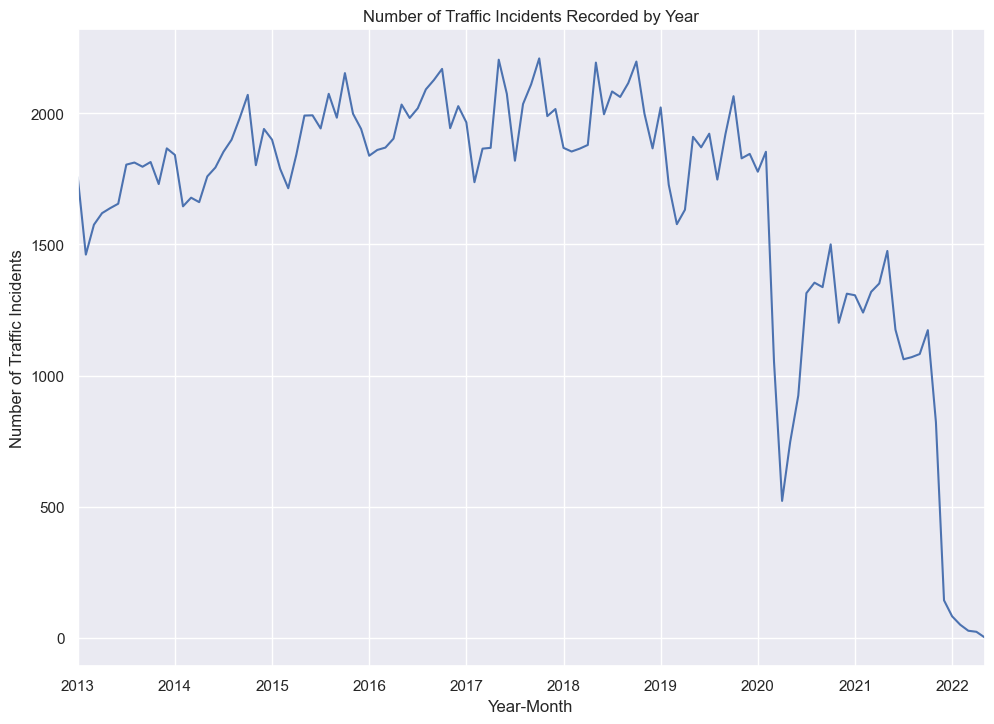

In [224]:
traffic_data['Year-Month'] = traffic_data.Datetime.dt.to_period("M")

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.ylabel('Number of Traffic Incidents')
plt.title('Number of Traffic Incidents Recorded by Year')
traffic_data.groupby(traffic_data['Year-Month'])["offense_code"].count().plot()

The initial exploratory analysis reveals that the total number of recorded traffic incidents generally appears to be on a downward trend, with 2020 resulting in the fewest number of incidents.

The below cells show the total number of fatalities and serious injuries between 2013-2023 as a result of a traffic incident:

<Axes: title={'center': 'Number of Incident Fatalities by Year since 2013'}, xlabel='Datetime', ylabel='Number of Fatalities'>

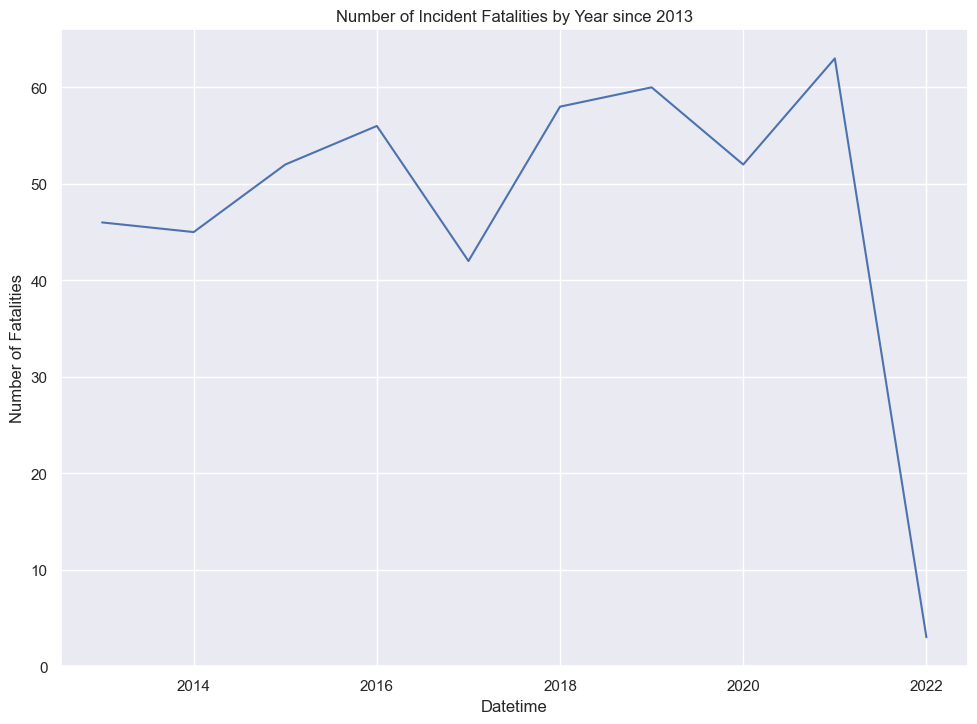

In [225]:
# we can plot fatalities over time
# we can plot seriosly injured over time

plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Number of Incident Fatalities by Year since 2013')
traffic_data.groupby(traffic_data.Datetime.dt.year)['FATALITIES'].sum().plot()


<Axes: title={'center': 'Number of Incident Injuries by Year since 2013'}, xlabel='Datetime', ylabel='Number of Seriously Injured'>

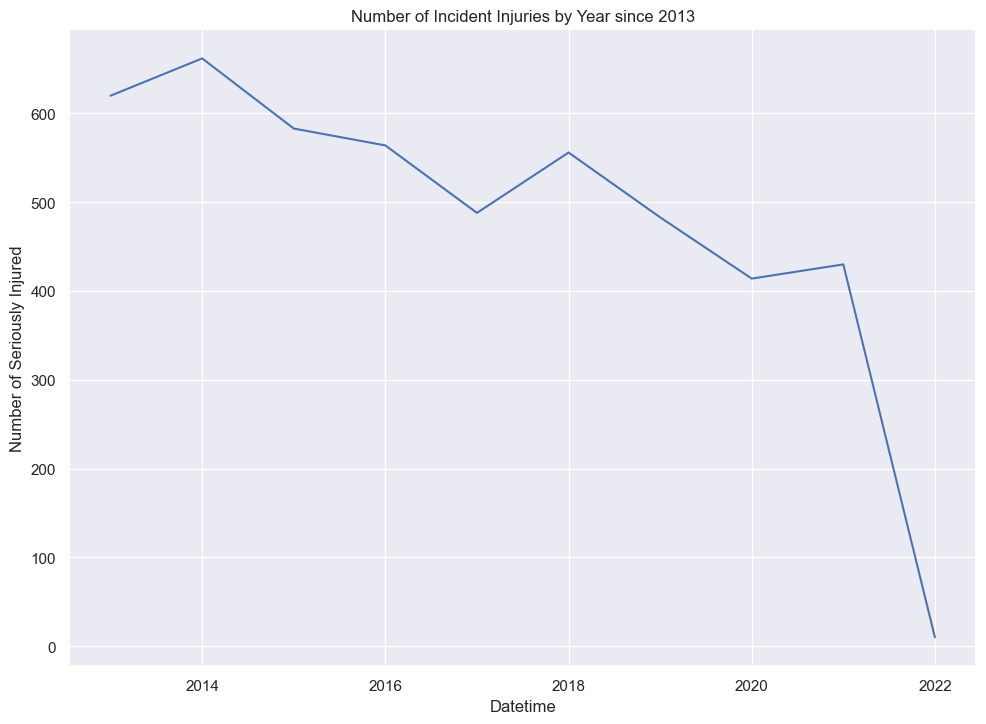

In [226]:
plt.xlabel('Year')
plt.ylabel('Number of Seriously Injured')
plt.title('Number of Incident Injuries by Year since 2013')
traffic_data.groupby(traffic_data.Datetime.dt.year)['SERIOUSLY_INJURED'].sum().plot()

Again, it appears that both injuries and fatalities from traffic incidents generally appear to be on a downward trend. However, the number of serious injuries still appears to be significantly higher than fatalities from traffic incidents.

Looking more closely at features of fatal incidents:

In [186]:
fatal = traffic_data[traffic_data.FATALITIES > 0]
fatal.FATALITY_MODE_1.value_counts()

PASSENGER CAR/VAN                         126
PEDESTRIAN                                100
MOTORCYCLE                                 85
SUV                                        48
OTHER                                      43
BICYCLE                                    21
PICKUP TRUCK/UTILITY VAN                   20
MOTORIZED BICYCLE                           4
VEHICLE OVER 10000 LBS                      3
PICKUP TRUCK/UTILITY VAN WITH TRAILIER      3
N/A                                         1
FARM EQUIPMENT                              1
SCHOOL BUS                                  1
Name: FATALITY_MODE_1, dtype: int64

In [187]:
fatal.TU1_VEHICLE_TYPE.value_counts()

PASSENGER CAR/VAN                         150
SUV                                        76
OTHER                                      67
MOTORCYCLE                                 64
PICKUP TRUCK/UTILITY VAN                   35
N/A                                        18
BICYCLE                                    14
HIT AND RUN UNKNOWN                        11
VEHICLE OVER 10000 LBS                     10
PICKUP TRUCK/UTILITY VAN WITH TRAILIER      6
MOTORIZED BICYCLE                           3
MOTOR HOME                                  1
SCHOOL BUS                                  1
Name: TU1_VEHICLE_TYPE, dtype: int64

<Axes: xlabel='Datetime'>

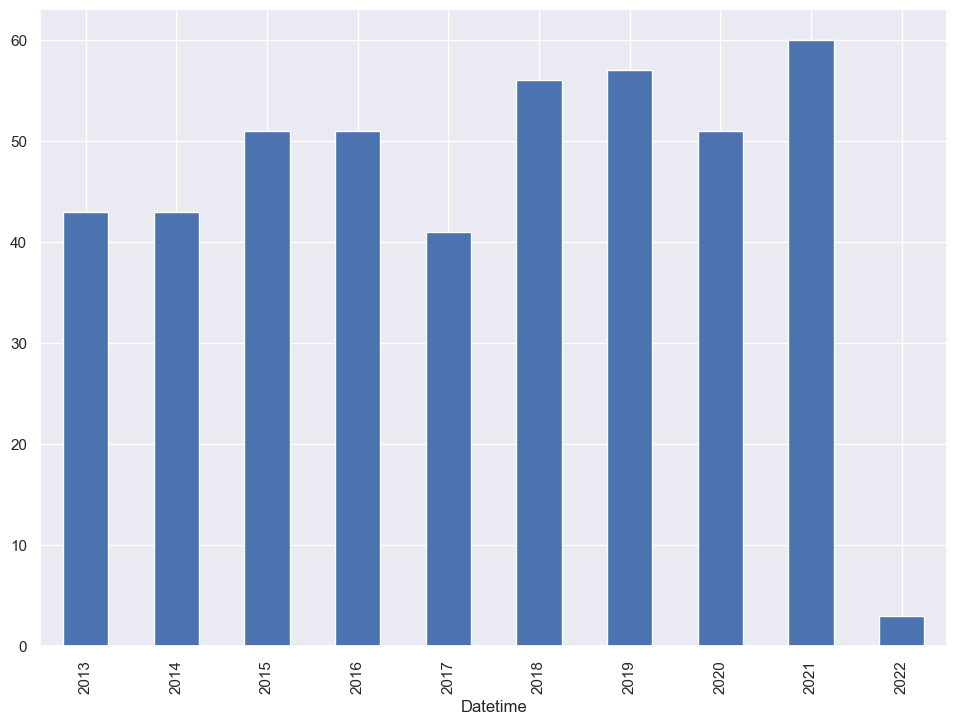

In [227]:
fatal.groupby(fatal.Datetime.dt.year)["offense_code"].count().plot(kind='bar')

Despite traffic accidents decreasing during the pandemic, fatalities seems unchanged

In [189]:
# Fatality mode will probably only have date if there is a fatality
# There are 103 entries that involve a pedestrian fatality
traffic_data[traffic_data.FATALITY_MODE_1 == "PEDESTRIAN"]

,offense_code,offense_code_extension,top_traffic_accident_offense,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,...,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,Datetime,Date,Time
2265,5441,2,TRAF - ACCIDENT - FATAL,2018-09-10 19:42:00.000000,W HAMPDEN AVE / S SHERIDAN BLVD,3125835.0,1663110.0,-105.053094,39.653183,4,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-09-10 19:42:00.000000,2018-09-10,19:42:00
3118,5441,2,TRAF - ACCIDENT - FATAL,2018-10-01 21:35:00.000000,5100 BLOCK N FEDERAL BLVD,3133456.0,1713050.0,-105.025101,39.790172,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-10-01 21:35:00.000000,2018-10-01,21:35:00
3816,5441,2,TRAF - ACCIDENT - FATAL,2018-07-21 23:58:00.000000,I25 HWYSB / 20TH ST,3139228.0,1702512.0,-105.004766,39.761159,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-07-21 23:58:00.000000,2018-07-21,23:58:00
4283,5441,2,TRAF - ACCIDENT - FATAL,2018-05-30 22:33:00.000000,6200 BLOCK E MLK BLVD,3164148.0,1702881.0,-104.916120,39.761766,2,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-05-30 22:33:00.000000,2018-05-30,22:33:00
5347,5441,2,TRAF - ACCIDENT - FATAL,2018-05-25 01:23:00.000000,2600 BLOCK W EVANS AVE,3135330.0,1672415.0,-105.019198,39.678594,4,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-05-25 01:23:00.000000,2018-05-25,01:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224393,5441,2,TRAF - ACCIDENT - FATAL,2018-09-29 23:38:00.000000,N TOWER RD / E 65TH AVE,3204484.0,1722425.0,-104.772092,39.814617,5,...,CROSS/ENTER NOT AT INTERSECTION,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-09-29 23:38:00.000000,2018-09-29,23:38:00
225559,5441,2,TRAF - ACCIDENT - FATAL,2018-07-20 19:19:00.000000,4600 BLOCK N ELM CT,3134142.0,1709755.0,-105.022721,39.781117,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-07-20 19:19:00.000000,2018-07-20,19:19:00
226473,5441,2,TRAF - ACCIDENT - FATAL,2018-10-02 01:30:00.000000,I25 HWYSB / W 23RD AVE,3135866.0,1698897.0,-105.016793,39.751285,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-10-02 01:30:00.000000,2018-10-02,01:30:00
227183,5441,2,TRAF - ACCIDENT - FATAL,2018-08-08 23:49:00.000000,W ALAMEDA AVE / S PECOS ST,3138903.0,1684305.0,-105.006274,39.711183,4,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2018-08-08 23:49:00.000000,2018-08-08,23:49:00


Looking closely at incidents resulting in serious injuries:

In [190]:
injured = traffic_data[traffic_data.SERIOUSLY_INJURED > 0]
injured.SERIOUSLY_INJURED_MODE_1.value_counts()

PASSENGER CAR/VAN                         1490
MOTORCYCLE                                 636
SUV                                        561
PEDESTRIAN                                 489
OTHER                                      429
BICYCLE                                    274
PICKUP TRUCK/UTILITY VAN                   170
PICKUP TRUCK/UTILITY VAN WITH TRAILIER      35
MOTORIZED BICYCLE                           27
VEHICLE OVER 10000 LBS                      26
TRANSIT BUS                                 14
N/A                                         12
HIT AND RUN UNKNOWN                         12
PASSENGER CAR/VAN WITH TRAILER               8
SUV WITH TRAILER                             3
SCHOOL BUS                                   2
LIGHT RAIL                                   1
Name: SERIOUSLY_INJURED_MODE_1, dtype: int64

C:\Users\katie\AppData\Local\Temp\ipykernel_13172\4073518369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injured['Year'] = injured.Datetime.dt.year


Text(0.5, 1.0, 'Number of Seriously Injured by Mode and Year')

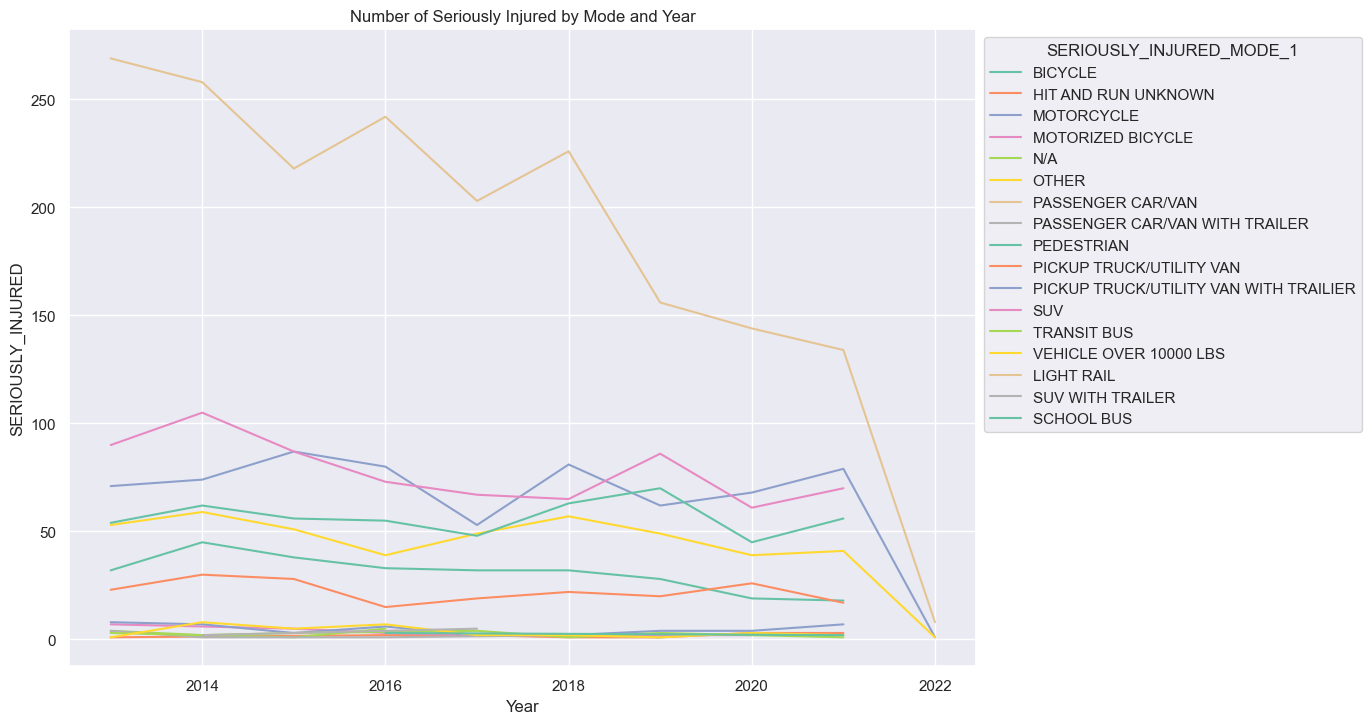

In [228]:
#injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot()

# injured.set_index(injured.Datetime.dt.year, inplace=True)
# injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot(legend=True, xlabel="Year", ylabel="injured")

injured['Year'] = injured.Datetime.dt.year
injuries_over_time1 = injured.groupby(['Year','SERIOUSLY_INJURED_MODE_1'], as_index=False)['SERIOUSLY_INJURED'].sum()
injuries_over_time1


ax = sns.lineplot(x= 'Year', y='SERIOUSLY_INJURED', hue='SERIOUSLY_INJURED_MODE_1', palette = "Set2", data=injuries_over_time1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Number of Seriously Injured by Mode and Year")


From the plot above, we can see that the majority of the victims who were seriously injured in a traffic incident appeared to have been in passenger cars/vans, followed by motorcycles and suvs, while generally, the overall trend of serious traffic accidents appears to be decreasing. 

Text(0, 0.5, 'Vehicle type')

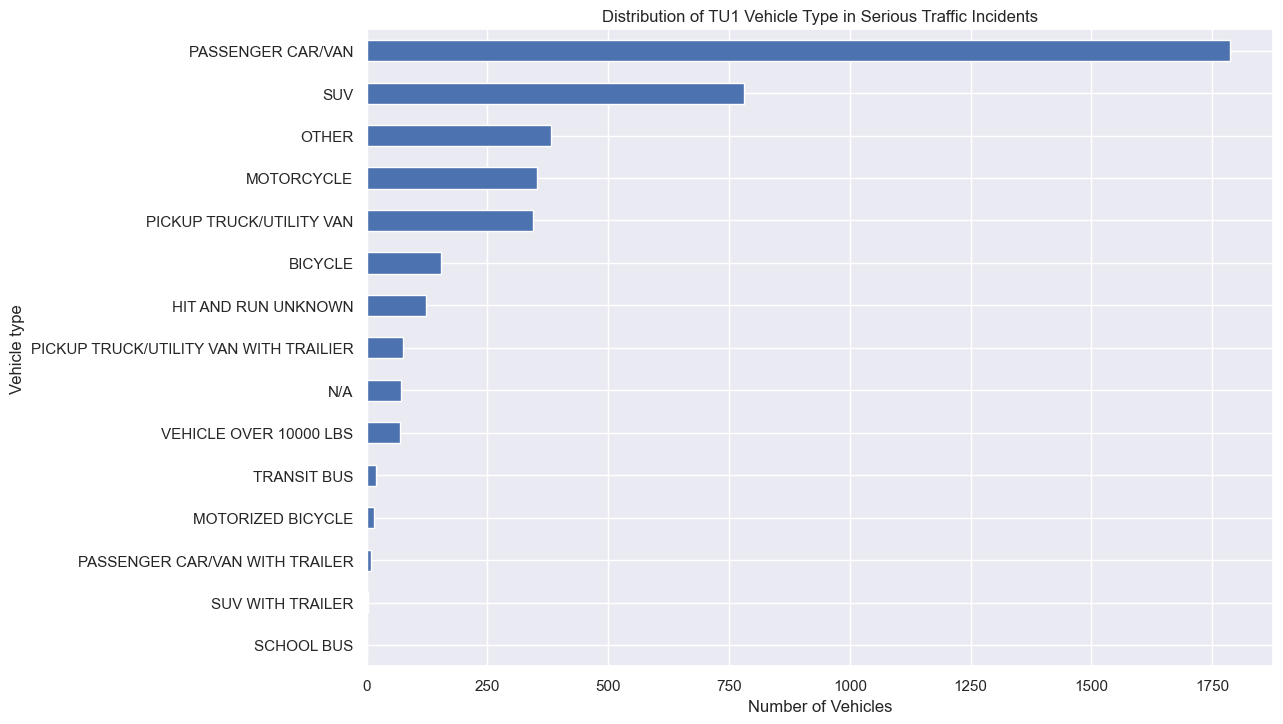

In [229]:
# distribution of injured tu1_vehicle type

injured.TU1_VEHICLE_TYPE.value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of TU1 Vehicle Type in Serious Traffic Incidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle type')


From the chart above, we can see that the overwhelming majority of vehicle types causing these incidents are passenger cars/vans, followed by suvs and other vehicle types.

Text(0.5, 1.0, 'Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023')

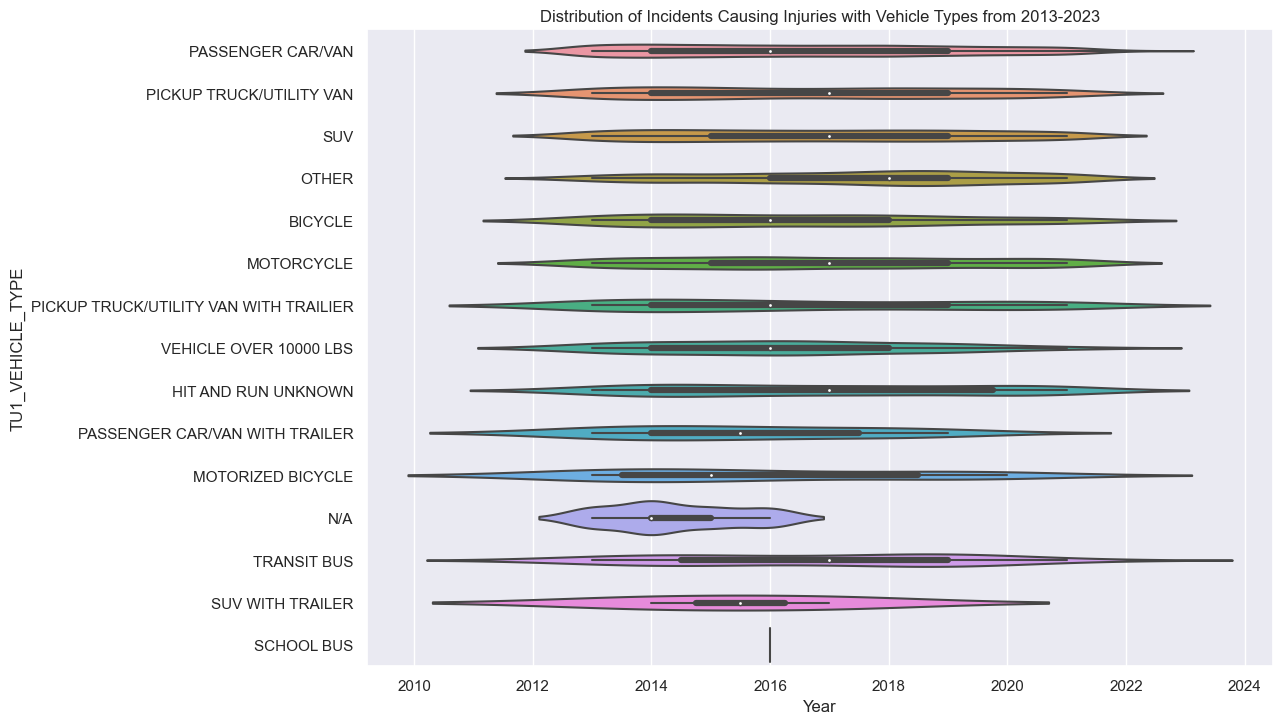

In [244]:
sns.violinplot(y = 'TU1_VEHICLE_TYPE', x = 'Year', data = injured)
plt.title("Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023")

The violin plot above shows the distribution of the different vehicle types that caused serious injuries across the years. It appears that the frequency of accidents across all vehicle categories remained approximately even across all years shown in the chart, with most incidents tapering off in recent years. Accidents caused by 'other' vehicle types appears to have slightly increased in frequency from 2018 and above, while most other categories appear to show a decrease in frequency from 2020 onwards.

### Part V. Conclusion



Overall, it appears that incident fatalities and injuries are on a downward trend. Unsurprisingly, injuries are most frequently caused and sustained in passenger cars/vans. This can be attributed to the fact that most people in the population drive passenger vehicles as opposed to other types modes of transportation. Thus it appears that incidents of passenger cars - passenger cars are the most common types of vehicle incidents resulting in a fatality or serious injury, with passenger cars being the most frequent mode of transportation to both be injured and the driver at fault. Following passenger vehicles, motorcycles and SUVs are the mode of transportation in which drivers appear to be injured frequently.

Some time periods to note include 2020, in which the global pandemic can be attributed to the sharp downward spike in overall vehicle incidents. With fewer drivers on the road, it is unsurprising that there are fewer traffic incidents recorded overall. Following 2020, traffic accidents increased, but not to the same pre-pandemic levels.

There appeared to be no notable outliers in this particular dataset over the time period that was analyzed. This is likely because of the overall size of the dataset (~220k rows). From a yearly view, any outliers would likely not affect the general analysis of the data, and thus we can reasonably conclude that our observations are fairly accurate.